In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

dataset = pd.read_csv('testdata-latlong.csv')
dataset.columns

Index(['Lat ', 'Long'], dtype='object')

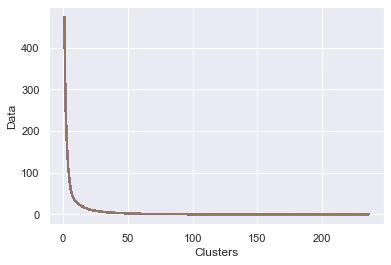

In [2]:
x = dataset.copy()

from sklearn import preprocessing
x_scaled = preprocessing.scale(x)

l = list()
for i in range(1, 237):
    km = KMeans(i)
    km.fit(x_scaled)
    l.append(km.inertia_)

for i in range(1, 237):
    plt.plot(range(1, 237), l)
    plt.xlabel('Clusters')
    plt.ylabel('Data')

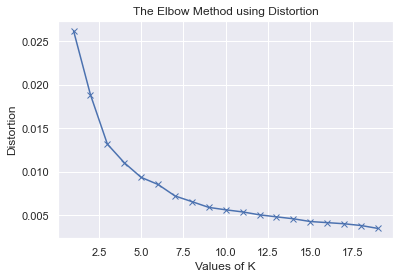

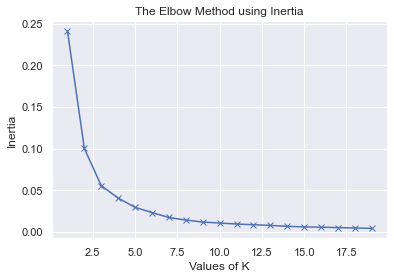

In [3]:
x1 = list()
x2 = list()

for index, row in dataset.iloc[1:].iterrows():
    x1.append(dataset.loc[:index].tail(2).head(1).iloc[0,0])
    x2.append(dataset.loc[:index].tail(2).head(1).iloc[0,1])
    
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

from sklearn import metrics 
from scipy.spatial.distance import cdist 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 

K = range(1,20) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_)   
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [4]:
#Let's take 5 store locations because it's very close to the elbow point of both graphs, and economical

In [5]:
km.fit(x_scaled)
km_new = KMeans(5)
cl_new = dataset.copy()
cl_new['Cluster_No.'] = km_new.fit_predict(x_scaled)
cl_new

,Lat,Long,Cluster_No.
0,32.549009,-83.156737,1
1,32.553748,-83.167706,1
2,32.553282,-83.155563,1
3,32.552286,-83.153496,1
4,32.553519,-83.154454,1
...,...,...,...
232,32.563984,-83.100397,4
233,32.561700,-83.099013,4
234,32.563527,-83.099718,4
235,32.562853,-83.098677,4


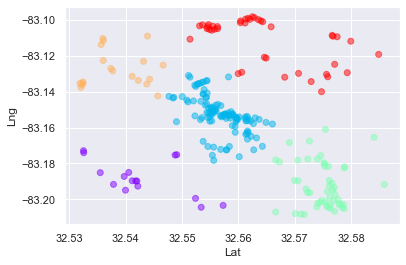

In [6]:
plt.scatter(cl_new['Lat '], cl_new['Long'], c = cl_new['Cluster_No.'], cmap = 'rainbow', alpha = 0.5)
plt.xlabel('Lat')
plt.ylabel('Lng')
plt.show()

In [7]:
cluster1 = cl_new.copy()
cluster2 = cl_new.copy()
cluster3 = cl_new.copy()
cluster4 = cl_new.copy()
cluster5 = cl_new.copy()

cluster1 = cluster1.loc[cluster1['Cluster_No.'] == 0]
cluster2 = cluster2.loc[cluster2['Cluster_No.'] == 1]
cluster3 = cluster3.loc[cluster3['Cluster_No.'] == 2]
cluster4 = cluster4.loc[cluster4['Cluster_No.'] == 3]
cluster5 = cluster5.loc[cluster5['Cluster_No.'] == 4]


cluster1 = cluster1.reset_index()
cluster1 = cluster1.filter(['Lat ', 'Long', 'Cluster_No.'])
cluster2 = cluster2.reset_index()
cluster2 = cluster2.filter(['Lat ', 'Long', 'Cluster_No.'])
cluster3 = cluster3.reset_index()
cluster3 = cluster3.filter(['Lat ', 'Long', 'Cluster_No.'])
cluster4 = cluster4.reset_index()
cluster4 = cluster4.filter(['Lat ', 'Long', 'Cluster_No.'])
cluster5 = cluster5.reset_index()
cluster5 = cluster5.filter(['Lat ', 'Long', 'Cluster_No.'])

print(len(cluster1) + len(cluster2) + len(cluster3) + len(cluster4) + len(cluster5))
# The number of houses in each cluster is correct without any overlap

237


In [8]:
import math

def centroid(dataframe):    
    latitude  = list()
    longitude = list()
    
    for index, row in dataframe.iloc[1:].iterrows():
        latitude.append(dataframe.loc[:index].tail(2).head(1).iloc[0,0])
        longitude.append(dataframe.loc[:index].tail(2).head(1).iloc[0,1])
    
    latsum = 0
    latcnt = 0
    for i in latitude:
        latsum += i
        latcnt += 1
        
    lngsum = 0
    lngcnt = 0
    for i in longitude:
        lngsum += i
        lngcnt += 1

    return (latsum/latcnt, lngsum/lngcnt)

ctr1 = centroid(cluster1)
ctr2 = centroid(cluster2)
ctr3 = centroid(cluster3)
ctr4 = centroid(cluster4)
ctr5 = centroid(cluster5)

print(ctr1)
print(ctr2)
print(ctr3)
print(ctr4)
print(ctr5)

#Following are the final co-ordinates of the stores

(32.54195193333333, -83.1871932)
(32.556786376146796, -83.1529583027523)
(32.57484903999998, -83.19216985999998)
(32.538143999999996, -83.12868644444444)
(32.56458945000001, -83.11177487500001)


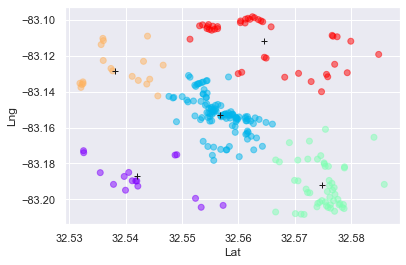

In [9]:
plt.scatter(cl_new['Lat '], cl_new['Long'], c = cl_new['Cluster_No.'], cmap = 'rainbow', alpha = 0.5)

ctr1lat, ctr1lng = ctr1
ctr2lat, ctr2lng = ctr2
ctr3lat, ctr3lng = ctr3
ctr4lat, ctr4lng = ctr4
ctr5lat, ctr5lng = ctr5


plt.plot(ctr1lat, ctr1lng, 'k+')
plt.plot(ctr2lat, ctr2lng, 'k+')
plt.plot(ctr3lat, ctr3lng, 'k+')
plt.plot(ctr4lat, ctr4lng, 'k+')
plt.plot(ctr5lat, ctr5lng, 'k+')


plt.xlabel('Lat')
plt.ylabel('Lng')
plt.show()

# + Correspond to store locations

In [10]:
cl_new = cl_new.assign(distance_km = np.zeros(237), storelat = np.zeros(237), storelng = np.zeros(237))

import geopy.distance


lattemp = cl_new.iloc[0,0]
lngtemp = cl_new.iloc[0,1]
crdtemp = (lattemp, lngtemp)

lsttemp = list()

lsttemp.append(geopy.distance.vincenty(crdtemp, ctr1).km)
lsttemp.append(geopy.distance.vincenty(crdtemp, ctr2).km)
lsttemp.append(geopy.distance.vincenty(crdtemp, ctr3).km)
lsttemp.append(geopy.distance.vincenty(crdtemp, ctr4).km)
lsttemp.append(geopy.distance.vincenty(crdtemp, ctr5).km)

cl_new.iloc[0,3] = min(lsttemp)
i = lsttemp.index(min(lsttemp))

if(i == 0):
    cl_new.iloc[0,4] = ctr1lat
    cl_new.iloc[0,5] = ctr1lng
        
if(i == 1):
    cl_new.iloc[0,4] = ctr2lat
    cl_new.iloc[0,5] = ctr2lng
        
if(i == 2):
    cl_new.iloc[0,4] = ctr3lat
    cl_new.iloc[0,5] = ctr3lng
        
if(i == 3):
    cl_new.iloc[0,4] = ctr4lat
    cl_new.iloc[0,5] = ctr4lng
        
if(i == 4) :
    cl_new.iloc[0,4] = ctr5lat
    cl_new.iloc[0,5] = ctr5lng


for index, row in cl_new.iloc[1:].iterrows():
    lat = cl_new.loc[:index].tail(2).head(1).iloc[0,0]
    lng = cl_new.loc[:index].tail(2).head(1).iloc[0,1]
    tempcord = (lat,lng)
    
    templist = list()
    templist.append(geopy.distance.vincenty(tempcord, ctr1).km)
    templist.append(geopy.distance.vincenty(tempcord, ctr2).km)
    templist.append(geopy.distance.vincenty(tempcord, ctr3).km)
    templist.append(geopy.distance.vincenty(tempcord, ctr4).km)
    templist.append(geopy.distance.vincenty(tempcord, ctr5).km)

    cl_new.loc[index, 'distance_km'] = min(templist)
    
    ind = templist.index(min(templist))
    
    if(ind == 0):
        cl_new.loc[index, 'storelat'] = ctr1lat
        cl_new.loc[index, 'storelng'] = ctr1lng
        
    if(ind == 1):
        cl_new.loc[index, 'storelat'] = ctr2lat
        cl_new.loc[index, 'storelng'] = ctr2lng
        
    if(ind == 2):
        cl_new.loc[index, 'storelat'] = ctr3lat
        cl_new.loc[index, 'storelng'] = ctr3lng
        
    if(ind == 3):
        cl_new.loc[index, 'storelat'] = ctr4lat
        cl_new.loc[index, 'storelng'] = ctr4lng
        
    if(ind == 4) :
        cl_new.loc[index, 'storelat'] = ctr5lat
        cl_new.loc[index, 'storelng'] = ctr5lng
        


print(len(cl_new[cl_new['distance_km'] > 1.5]))
cl_new

<ipython-input-10-eb18ea71be43>:12: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  lsttemp.append(geopy.distance.vincenty(crdtemp, ctr1).km)
<ipython-input-10-eb18ea71be43>:13: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  lsttemp.append(geopy.distance.vincenty(crdtemp, ctr2).km)
<ipython-input-10-eb18ea71be43>:14: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  lsttemp.append(geopy.distance.vincenty(crdtemp, ctr3).km)
<ipython-input-10-eb18ea71be43>:15: DeprecationWarning: Vincenty is deprecated 

54


,Lat,Long,Cluster_No.,distance_km,storelat,storelng
0,32.549009,-83.156737,1,0.932649,32.556786,-83.152958
1,32.553748,-83.167706,1,0.932649,32.556786,-83.152958
2,32.553282,-83.155563,1,1.425487,32.556786,-83.152958
3,32.552286,-83.153496,1,0.459209,32.556786,-83.152958
4,32.553519,-83.154454,1,0.501625,32.556786,-83.152958
...,...,...,...,...,...,...
232,32.563984,-83.100397,4,1.179857,32.564589,-83.111775
233,32.561700,-83.099013,4,1.070602,32.564589,-83.111775
234,32.563527,-83.099718,4,1.240577,32.564589,-83.111775
235,32.562853,-83.098677,4,1.138376,32.564589,-83.111775


In [11]:
#Sometimes even though a house belongs to some cluster, the nearest store might be the centroid of another one

In [12]:
cl_new.to_csv('updated.csv') 

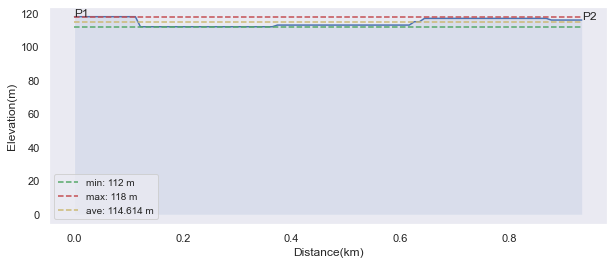

In [19]:
import urllib.request
import json

P1 = [32.549009,-83.156737]
P2 = [32.556786,-83.152958]

s = 100
interval_lat = (P2[0]-P1[0])/s 
interval_lon = (P2[1]-P1[1])/s

lat0 = P1[0]
lon0 = P1[1]

lat_list = [lat0]
lon_list = [lon0]

for i in range(s):
    lat_step=lat0+interval_lat
    lon_step=lon0+interval_lon
    lon0=lon_step
    lat0=lat_step
    lat_list.append(lat_step)
    lon_list.append(lon_step)
    
def haversine(lat1, lon1, lat2, lon2):
    lat1_rad  = math.radians(lat1)
    lat2_rad  = math.radians(lat2)
    lon1_rad  = math.radians(lon1)
    lon2_rad  = math.radians(lon2)
    delta_lat = lat2_rad-lat1_rad
    delta_lon = lon2_rad-lon1_rad
    a = math.sqrt((math.sin(delta_lat/2))**2+math.cos(lat1_rad)*math.cos(lat2_rad)*(math.sin(delta_lon/2))**2)
    d = 2*6371000*math.asin(a)
    return d

d_list=[]
for j in range(len(lat_list)):
    lat_p = lat_list[j]
    lon_p = lon_list[j]
    dp = haversine(lat0,lon0,lat_p,lon_p)/1000 
    d_list.append(dp)
d_list_rev=d_list[::-1]

d_ar = [{}]*len(lat_list)
for i in range(len(lat_list)):
    d_ar[i] = {"latitude":lat_list[i],"longitude":lon_list[i]}
location = {"locations":d_ar}
json_data = json.dumps(location, skipkeys = int).encode('utf8')

url = "https://api.open-elevation.com/api/v1/lookup"
response = urllib.request.Request(url,json_data,headers={'Content-Type': 'application/json'})
fp = urllib.request.urlopen(response)

res_byte = fp.read()
res_str  = res_byte.decode("utf8")
js_str   = json.loads(res_str)
fp.close()

response_len=len(js_str['results'])
elev_list=[]
for j in range(response_len):
    elev_list.append(js_str['results'][j]['elevation'])
    
mean_elev = round((sum(elev_list)/len(elev_list)),3)
min_elev  = min(elev_list)
max_elev  = max(elev_list)
distance  = d_list_rev[-1]

base_reg=0
plt.figure(figsize=(10,4))
plt.plot(d_list_rev,elev_list)
plt.plot([0,distance],[min_elev,min_elev],'--g',label='min: '+str(min_elev)+' m')
plt.plot([0,distance],[max_elev,max_elev],'--r',label='max: '+str(max_elev)+' m')
plt.plot([0,distance],[mean_elev,mean_elev],'--y',label='ave: '+str(mean_elev)+' m')
plt.fill_between(d_list_rev,elev_list,base_reg,alpha=0.1)
plt.text(d_list_rev[0],elev_list[0],"P1")
plt.text(d_list_rev[-1],elev_list[-1],"P2")
plt.xlabel("Distance(km)")
plt.ylabel("Elevation(m)")
plt.grid()
plt.legend(fontsize='small')
plt.show()

#Elevation profile for first house location and nearest store